In [133]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3gLj0Q6'

import zipfile
with zipfile.ZipFile('3gLj0Q6', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-06-07 20:22:26--  https://bit.ly/3gLj0Q6
bit.ly (bit.ly) 해석 중... 67.199.248.11, 67.199.248.10
다음으로 연결 중: bit.ly (bit.ly)|67.199.248.11|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E [따라감]
--2022-06-07 20:22:26--  https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E
drive.google.com (drive.google.com) 해석 중... 142.250.206.206
다음으로 연결 중: drive.google.com (drive.google.com)|142.250.206.206|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 303 See Other
위치: https://doc-0c-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0vd21oofq1l16l670d2dps90n663jjic/1654600875000/17946651057176172524/*/1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E?e=download [따라감]
경고: HTTP에 와일드카드 문자를 지원하지 않습니다.
--2022-06-07 20:22:27--  https://doc-0c-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0vd21oofq1l16l670d2dps90n663jjic/1654600875000/

In [134]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

train = pd.read_csv('/Users/krc/Downloads/따릉이/train.csv') 
test = pd.read_csv('/Users/krc/Downloads/따릉이/test.csv')

In [98]:
train.shape

(1459, 11)

In [99]:
test.shape

(715, 10)

In [100]:
# 데이터 살펴보기
train.head(100)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
95,142,19,25.0,0.0,3.7,24.0,2000.0,0.054,41.0,23.0,252.0
96,144,22,14.3,0.0,1.7,72.0,820.0,0.006,60.0,45.0,108.0
97,145,11,23.3,0.0,1.2,32.0,1001.0,0.027,63.0,33.0,104.0
98,146,19,17.8,0.0,3.6,53.0,746.0,0.040,83.0,47.0,204.0


In [101]:
print(train.isnull())
print('\n----------------train.csv 각 열 별 결측치 수-------------------\n')
print(test.isnull().sum())

         id   hour  hour_bef_temperature  hour_bef_precipitation  \
0     False  False                 False                   False   
1     False  False                 False                   False   
2     False  False                 False                   False   
3     False  False                 False                   False   
4     False  False                 False                   False   
...     ...    ...                   ...                     ...   
1454  False  False                 False                   False   
1455  False  False                 False                   False   
1456  False  False                 False                   False   
1457  False  False                 False                   False   
1458  False  False                 False                   False   

      hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
0                  False              False                False   
1                  False              False    

In [102]:
# 데이터 프레임 정보 확인
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dt

In [103]:
# 데이터 기술 통계량 확인
train.describe(include = "all")

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


<AxesSubplot:xlabel='hour'>

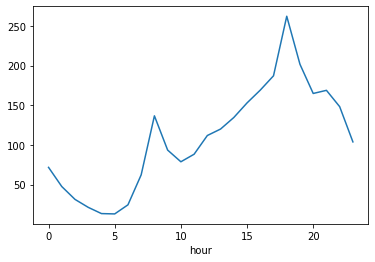

In [104]:
# 시간별로 column별 평균 산출하고 그 중 count만 확인 -> 출근,퇴근 시간에 대여량 확 증가
train.groupby('hour').mean()['count'].plot()

<AxesSubplot:>

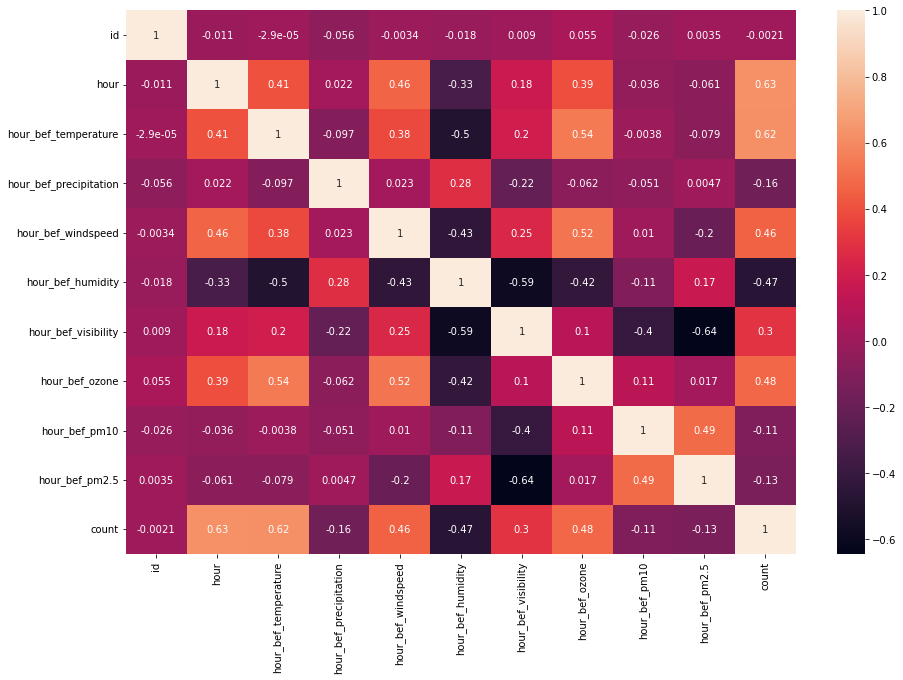

In [105]:
# 상관계수 확인 hour, hour_bef_temperature, hour_bef_windspeed, hour_bef_ozone 총 4가지 상관계수가 높은 것 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot = True)

In [106]:
# 결측치 확인
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [107]:
# 결측치 전처리 
train = train.dropna()
test = test.fillna(0)

In [114]:
# 결측치 처리됨
train[train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


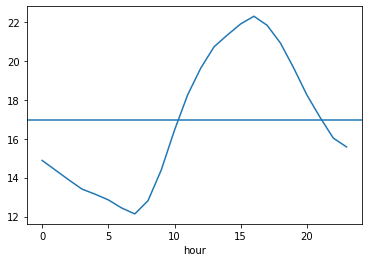

In [116]:
# 시간 별 온도 경향성으로 결측치 평균온도를 넣기엔 시간대 온도와 차이 많이 날 수 있음. 
train.groupby('hour').mean()['hour_bef_temperature'].plot()
plt.axhline(train.groupby('hour').mean()['hour_bef_temperature'].mean())

In [123]:
train.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.882456
2     13.889831
3     13.413559
4     13.148333
5     12.857627
6     12.443103
7     12.135593
8     12.816949
9     14.393333
10    16.437931
11    18.262069
12    19.644643
13    20.729091
14    21.327586
15    21.894737
16    22.288679
17    21.824074
18    20.916667
19    19.640678
20    18.251724
21    17.093220
22    16.030000
23    15.577966
Name: hour_bef_temperature, dtype: float64

In [109]:
# 의사결정나무 모델 scikit-learn에서 모듈 불러오기
import sklearn
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [110]:
# X 데이터는 예측에 사용되는 변수들, Y 데이터는 예측결과 변수여야 함
X_train = train.drop(['count'], axis=1)
Y_train = train['count']

In [111]:
# 모델 선언 후 fit()함수로 모델 훈련
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [112]:
# 훈련된 모델로 예측
data = model.predict(test)
data[:5]

array([117., 148., 104.,  49.,  93.])

In [113]:
# csv파일 df 파일로 불러오기
submission = pd.read_csv ('data/submission.csv')

In [83]:
# df 파일의 count 피쳐에 예측결과 할당
submission['count'] = data


In [84]:
# 제출파일 생성
submission.to_csv('sub.csv', index = False)